# Test des Effets DDSP et de Magenta

## Installation des packages nécessaires


In [ ]:
%tensorflow_version 2.x
print('Installing from pip package...')
!pip install -qU ddsp==1.0.1

Installing from pip package...


## Importation des librairies nécessaires

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import copy
import os
import time

import crepe
import ddsp
import ddsp.training
from ddsp.colab import colab_utils
from ddsp.colab.colab_utils import ( play, record, 
    specplot, upload, DEFAULT_SAMPLE_RATE)
import gin
from google.colab import files
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds


sample_rate = 48000


print('Done!')

Done!


## Record ou import du fichier Audio 

In [ ]:
record_or_upload = "Record" 

record_seconds =  10 #Sert à définir le nombre de seconde enregistré 

if record_or_upload == "Record":
  audio = record(seconds=record_seconds)
else:
  filenames, audios = upload()
  audio = audios[0]

audio = audio[np.newaxis, :]
print('\nExtracting audio features...')

#Sert à jouer l'audio enregistré ou importé
play(audio)

Starting recording for 10 seconds...


<IPython.core.display.Javascript object>

Finished recording!

Extracting audio features...


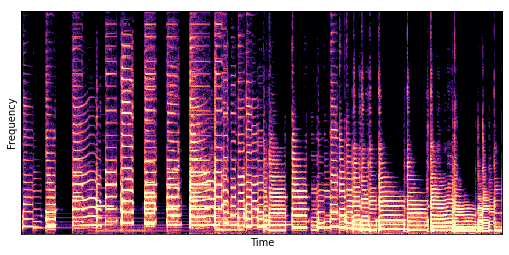

In [ ]:
#Tracé du spectrogramme du signal audio d'origine
specplot(audio)

## Mise en place des effets

### ***Reverb*** avec DDSP

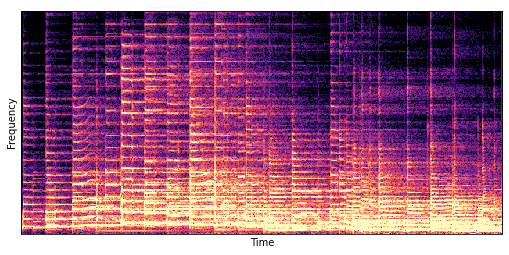

In [ ]:
## ExpDecayReverb
reverb = ddsp.effects.ExpDecayReverb(reverb_length=48000)

gain = [[-1.5]]
decay = [[2.0]]

audio_out_ExpDecayReverb = reverb(audio, gain, decay)


#Sert à jouer l'audio avec la reverb + tracé de son spectrogramme
play(audio_out_ExpDecayReverb)
specplot(audio_out_ExpDecayReverb)

### ***Flanger, Chorus, Delay, Vibrato*** avec DDSP

In [ ]:
n_samples = audio.shape[1]
n_seconds = n_samples / sample_rate

def sin_phase(mod_rate):
  phase = tf.sin(tf.linspace(0.0, mod_rate * n_seconds * 2.0 * np.pi, n_samples))
  phase = (phase[tf.newaxis, :, tf.newaxis] + 1.0) / 2.0  
  return phase

def modulate_audio(audio, center_ms, depth_ms, mod_rate):
  mod_delay = ddsp.effects.ModDelay(center_ms=center_ms,
                                    depth_ms=depth_ms,
                                    gain_scale_fn=None,
                                    phase_scale_fn=None)

  phase = sin_phase(mod_rate)  # Hz
  gain = 1.0 * np.ones_like(audio)[..., np.newaxis]
  audio_out = 0.5 * mod_delay(audio, gain, phase)

  #Sert à jouer l'audio avec l'effet + tracé de son spectrogramme
  play(audio_out)
  specplot(audio_out)


print('Flanger')
modulate_audio(audio, center_ms=0.75, depth_ms=0.75, mod_rate=0.25)
  
print('Chorus')
modulate_audio(audio, center_ms=25.0, depth_ms=1.0, mod_rate=2.0)

print('Vibrato')
modulate_audio(audio, center_ms=25.0, depth_ms=12.5, mod_rate=5)

print('Delay')
modulate_audio(audio, center_ms=25.0, depth_ms=20.0, mod_rate=1.0)